## Test 05: Pareto Front Approximation


#### Overview

This notebook illustrates how MAli can produce a variety of different trade-off solutions when the ```-pareto``` argument is used.


#### Context
This notebook is intended to test the following requirements of MAli:

**Requirement 5.1** - Leverages multiple objective functions to guide the alignment optimization process.

- In this notebook, MAli is used to optimize three objective functions at runtime:
   - Sum of Pairs (PAM250 Matrix) Affine Gap Penalties (open=4) (null=1)
   - Percentage of Totally Conserved Columns
   - Percentage Non-Gaps
- To view these objective function scores at runtime, you can run MAli in debug mode from this folder with the following command:
   - ```MAli-v1.31\MAli -input data\input\BB20016 -output data\output\BB20016 -pareto 25 -seed 25032025 -iterations 100 -debug```

**Requirement 5.2** - Approximates the Pareto Front, outputting a set of solutions that offer different trade-offs.

- In this notebook, MAli is tasked with outputting 25 tradeoff alignments, which have different combinations of objective function scores
- These solutions are plotted in the three-dimensional objective space at the foot of this notebook after alignment has been performed



In [1]:
import subprocess
import os
import shutil
from os import listdir

In [2]:
INPUT_DIR = "data/input"
REFERENCE_DIR = "data/ref"
TESTCASE_NAME = "BB20016"
TESTCASE_PATH = f"{INPUT_DIR}/{TESTCASE_NAME}"
REFERENCE_FILE_PATH = f"{REFERENCE_DIR}/{TESTCASE_NAME}"

In [3]:
OUTPUT_DIR = f"data/output"
OUTPUT_PATH = f"{OUTPUT_DIR}/{TESTCASE_NAME}"

In [4]:
if os.path.exists(OUTPUT_DIR):
    shutil.rmtree(OUTPUT_DIR)
os.makedirs(OUTPUT_DIR)

In [5]:
MALI_PATH = "MAli-v1.31/MAli"

In [6]:
SEED = 25032025
ITERATIONS = 100

In [7]:
line = f"{MALI_PATH} -input {TESTCASE_PATH} -output {OUTPUT_PATH} -pareto 25 -seed {SEED} -iterations {ITERATIONS}"
print(f"command to be run '{line}'")

command to be run 'MAli-v1.31/MAli -input data/input/BB20016 -output data/output/BB20016 -pareto 25 -seed 25032025 -iterations 100'


In [8]:
subprocess.run(line, capture_output=False)

CompletedProcess(args='MAli-v1.31/MAli -input data/input/BB20016 -output data/output/BB20016 -pareto 25 -seed 25032025 -iterations 100', returncode=0)

#### Recording Scores

In [9]:
INPUT_SCOREFILE_DIR = "data/scores/input"
MALI_SCOREFILE_DIR = "data/scores/mali"
REFERENCE_SCOREFILE_DIR = "data/scores/ref"

In [10]:
for OUTPUT_FOLDER in [INPUT_SCOREFILE_DIR, MALI_SCOREFILE_DIR, REFERENCE_SCOREFILE_DIR]:
    if os.path.exists(OUTPUT_FOLDER):
        shutil.rmtree(OUTPUT_FOLDER)
    os.makedirs(OUTPUT_FOLDER)

In [11]:
INPUT_SCOREFILE_PATH = f"{INPUT_SCOREFILE_DIR}/{TESTCASE_NAME}"
REFERENCE_SCOREFILE_PATH = f"{REFERENCE_SCOREFILE_DIR}/{TESTCASE_NAME}"

In [12]:
line = f"{MALI_PATH} -input {TESTCASE_PATH} -output {INPUT_SCOREFILE_PATH} -scoreonly"
print(f"command to be run '{line}'")
subprocess.run(line, capture_output=False)

command to be run 'MAli-v1.31/MAli -input data/input/BB20016 -output data/scores/input/BB20016 -scoreonly'


CompletedProcess(args='MAli-v1.31/MAli -input data/input/BB20016 -output data/scores/input/BB20016 -scoreonly', returncode=0)

In [13]:
line = f"{MALI_PATH} -input {OUTPUT_DIR} -output {MALI_SCOREFILE_DIR} -batch -scoreonly"
print(f"command to be run '{line}'")
subprocess.run(line, capture_output=False)

command to be run 'MAli-v1.31/MAli -input data/output -output data/scores/mali -batch -scoreonly'


CompletedProcess(args='MAli-v1.31/MAli -input data/output -output data/scores/mali -batch -scoreonly', returncode=0)

In [14]:
line = f"{MALI_PATH} -input {REFERENCE_FILE_PATH} -output {REFERENCE_SCOREFILE_PATH} -scoreonly"
print(f"command to be run '{line}'")
subprocess.run(line, capture_output=False)

command to be run 'MAli-v1.31/MAli -input data/ref/BB20016 -output data/scores/ref/BB20016 -scoreonly'


CompletedProcess(args='MAli-v1.31/MAli -input data/ref/BB20016 -output data/scores/ref/BB20016 -scoreonly', returncode=0)

#### Loading Scores & Plotting in 3D

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scorefile_reader import ScorefileReader
from scorefile_aggregator import ScorefileAggregator

In [16]:
aggregator = ScorefileAggregator()
dfInputs = aggregator.aggregate_scores_from_directory(INPUT_SCOREFILE_DIR)
dfMali = aggregator.aggregate_scores_from_directory(MALI_SCOREFILE_DIR)
dfReferences = aggregator.aggregate_scores_from_directory(REFERENCE_SCOREFILE_DIR)

In [21]:
def save_visualization(dfInputs, dfMali, dfReferences, plot_title, filename):

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    XNAME = "Sum of Pairs (PAM250 Matrix) Affine Gap Penalties (open=4) (null=1)"
    YNAME = "Percentage of Totally Conserved Columns"
    ZNAME = "Percentage Non-Gaps"

    LABELS = ["MAli", "in", "ref"]
    COLOURS = ["turquoise", "grey", "gold"]
    DATAFRAMES = [dfMali, dfInputs, dfReferences]

    for i in range(3):
        df = DATAFRAMES[i]
        scatter = ax.scatter(df[XNAME], df[YNAME], df[ZNAME], edgecolors="black", s=100, alpha=0.8, color=COLOURS[i], label=LABELS[i])
        
    plt.suptitle(plot_title)
    
    ax.set_xlabel("SoP w/ AGP")
    ax.set_ylabel("%TCCs")
    ax.set_zlabel("%Non-Gaps")
    
    ax.view_init(elev=15, azim=35, roll=0)

    plt.legend()
    
    plt.savefig(f"images/{filename}")


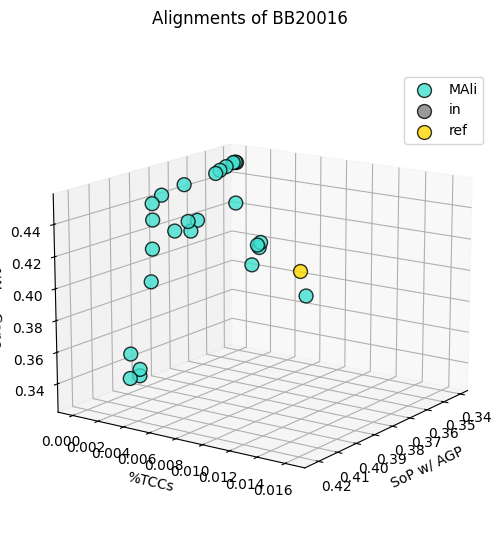

In [22]:
PLOT_TITLE = f"Alignments of {TESTCASE_NAME}"
save_visualization(dfInputs, dfMali, dfReferences, PLOT_TITLE, PLOT_TITLE)